# Name:Dhanashri Narayan Dewade

# Task 1: Prediction using Supervised Machine Learning 

## Predict the percentage of an student based on the no. of study hours. 


In [13]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [14]:
# Reading the Data 
url="http://bit.ly/w-data"
Data=pd.read_csv(url)
Data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [15]:
#check if there is null value in the given dataset
Data.isnull==True


False

**There is no null value in the given dataset.Now we can visualise our data**

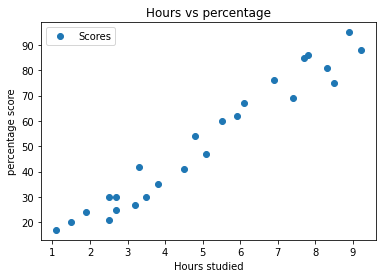

In [16]:
#plotting
Data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs percentage')
plt.xlabel('Hours studied')
plt.ylabel('percentage score')
plt.show()

**From the above Scattere plot, there is positive correlation between 'Hours studied' and 'Percentage score'.**
**Lets plot the regression line to confirm the correlation**

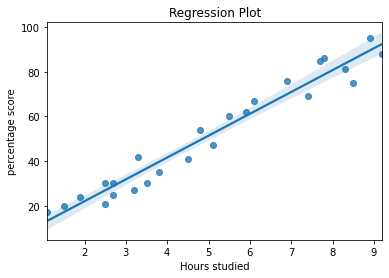

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [17]:
sns.regplot(y=Data['Scores'],x=Data['Hours'])
plt.title('Regression Plot')
plt.xlabel('Hours studied')
plt.ylabel('percentage score')
plt.show()
print(Data.corr())

**It is confirmed that the variables are positively correlated**

## Training the model

### 1) Spitting the Dataset

In [18]:
#defining the x and y from the Dataset
x=Data.iloc[:,:-1]
y=Data.iloc[:,1]

#spliting the Dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

### 2) Fitting the data into the model

In [19]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("model trained.")

model trained.


## Predicting the percentage of marks

In [20]:
y_pred=regressor.predict(x_test)
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
5,20,17.053665
2,27,33.694229
19,69,74.806209
16,30,26.842232
11,62,60.123359
22,35,39.567369
17,24,20.969092
24,86,78.721636


## Visually Comparing the Predicted Marks with the Actual Marks

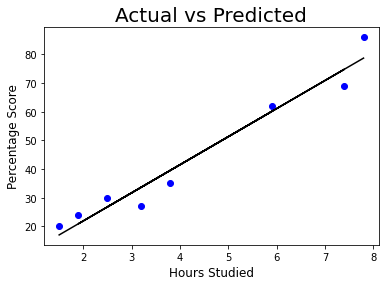

In [21]:
plt.scatter(x=x_test, y=y_test, color='blue')
plt.plot(x_test, y_pred, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Percentage Score', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

## Evaluating the Model

In [22]:
# Calculating the accuracy of the model
from sklearn.metrics import mean_absolute_error
print('Mean absolute error: ',mean_absolute_error(y_test,y_pred))

Mean absolute error:  4.4197278080276545


**Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.**

## What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [23]:
hours = [9.25]
answer = regressor.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 92.915


**According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 92.915 marks.**